In [4]:
f = open("../api_key.txt", "r")
api_key = f.readline()

In [2]:
import requests
import json
from os.path import exists
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import data_manager as dm

In [33]:
def predict_and_plot(symbol, api_key, model):
    x, y, time_series = dm.preprocess_data_cnn_1d(symbol, api_key)
    pred = model.predict(np.asarray(x))
    np.reshape(pred, ())
    stock_data = dm.get_stock_data(symbol, api_key)
    plt.plot(pd.to_datetime(stock_data['Dates']), np.array(stock_data['Prices']).astype(float))
    plt.plot(pd.to_datetime(time_series), pred)
    plt.legend(["Actual Price", "Predicted Price"])
    plt.show()

In [12]:
def get_compiled_model():
    model = keras.Sequential()
    model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(365,1,)))
    model.add(layers.MaxPooling1D())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mean_squared_error',
                  metrics=[tf.keras.metrics.MeanSquaredError()],
                  optimizer='adam')
    return model

In [16]:
def train_model(symbol, model, api_key, start=None, end=None):
    if (start is None and end is not None) or (start is not None and end is None):
        raise ValueError("start and end has to be both non-None or both None")
    x = y = []
    x, y, time_series = dm.preprocess_data_cnn_1d(symbol, api_key)
    model.fit(np.asarray(x), np.asarray(y), epochs=30, batch_size=128)
    return model

In [35]:
model = get_compiled_model()
train_model('IBM', model, api_key)

Epoch 1/30
43/43 [==============================] - 2s 39ms/step - loss: 6950.9551 - mean_squared_error: 6950.9546
Epoch 2/30
43/43 [==============================] - 2s 39ms/step - loss: 2624.7056 - mean_squared_error: 2624.7056
Epoch 3/30
43/43 [==============================] - 2s 39ms/step - loss: 2613.6721 - mean_squared_error: 2613.6709
Epoch 4/30
43/43 [==============================] - 2s 39ms/step - loss: 2610.3660 - mean_squared_error: 2610.3662
Epoch 5/30
43/43 [==============================] - 2s 38ms/step - loss: 2610.2610 - mean_squared_error: 2610.2605
Epoch 6/30
43/43 [==============================] - 2s 39ms/step - loss: 2598.9785 - mean_squared_error: 2598.9790
Epoch 7/30
43/43 [==============================] - 2s 42ms/step - loss: 2599.5444 - mean_squared_error: 2599.5447
Epoch 8/30
43/43 [==============================] - 2s 51ms/step - loss: 2599.1953 - mean_squared_error: 2599.1951
Epoch 9/30
43/43 [==============================] - 2s 54ms/step - loss: 2597.09

70/70 [==============================] - 0s 5ms/step
(2222, 181, 1)


ValueError: x and y can be no greater than 2D, but have shapes (2222,) and (2222, 181, 1)

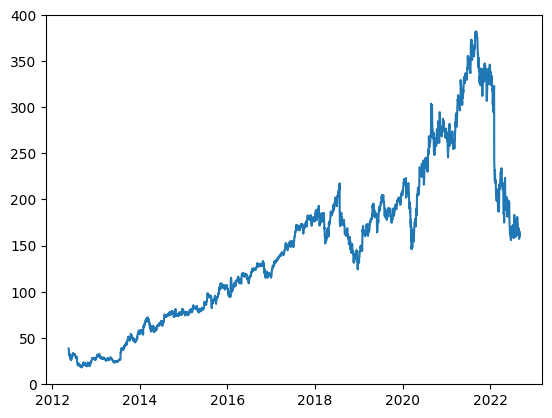

In [34]:
predict_and_plot("META", api_key, model)